In [16]:
from torch.utils.tensorboard.writer import SummaryWriter
from matplotlib import pyplot as plt
import numpy as np
import os

In [7]:
%load_ext tensorboard
%tensorboard --inspect --event_file=./defend/tensorboard/20231122-101707/events.out.tfevents.1700644627.heisenberg-Swift-SFX14-41G.49482.0 --tags = "actor loss"

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Launching TensorBoard...

In [10]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

In [35]:
import torch
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt
def log_data(log_dir = "20231122-101707/events.out.tfevents.1700644627.heisenberg-Swift-SFX14-41G.49482.0", tag ="actor loss"):
    filepath = os.path.join(os.path.dirname('./defend/tensorboard/'), log_dir)
   
    
    # Load TensorBoard events
    event_acc = EventAccumulator(filepath)
    event_acc.Reload()
    
    # Show all tags in the log file
    scalars = event_acc.Scalars(tag)
    
    # Extract data from TensorBoard events
    steps = [scalar.step for scalar in scalars]
    values = [scalar.value for scalar in scalars]
    
    # Apply moving average for smoothing
    window_size = 10  # Adjust the window size as needed
    smoothed_values = moving_average(values, window_size)
    
    # Adjust steps to match the smoothed data size
    smoothed_steps = steps[window_size-1:]
    
    # Plot using Matplotlib
    plt.plot(steps, values, label='data', alpha=0.5)
    plt.plot(smoothed_steps, smoothed_values, label=f'smoothe data) (Window Size: {window_size})', linewidth=2)
    plt.title('Actor loss for tqc')
    plt.xlabel('Steps')
    plt.ylabel('actor loss')
    #plt.legend()
    plt.show()

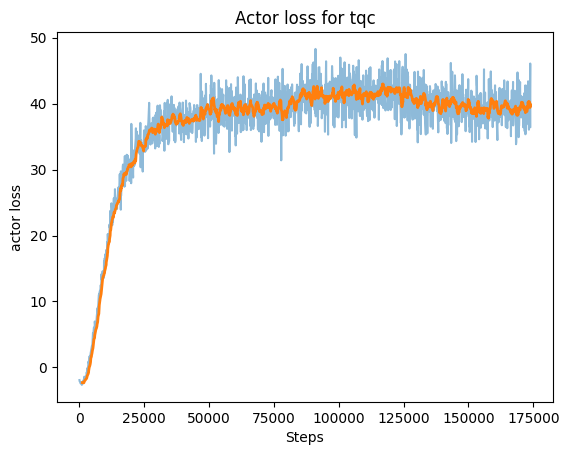

In [36]:
log_data()